# Character Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of the lab on SVM: Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) a dataset of traditional japanese handwritten kana.

The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  1.0.2


In [2]:
# helper function to load KMNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Set as seed for the random generator your Student ID (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 2081380 #Your_ID
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the K-MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the K-MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labelsT)
print("Frequencies in test set: ", freqsT)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [55 60 68 70 42 54 67 49 51 84]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [408 422 398 392 374 411 382 414 396 403]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


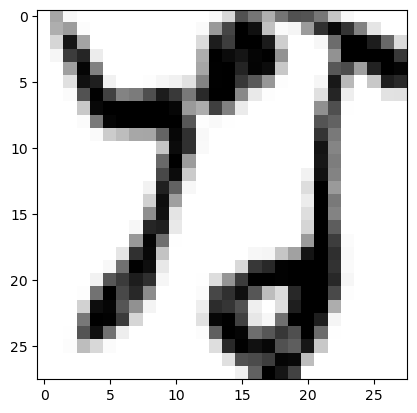

LABEL: 4
INPUT:


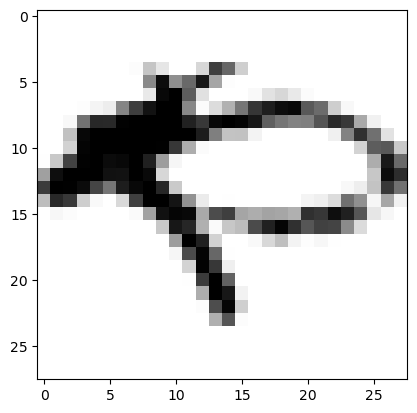

LABEL: 7
INPUT:


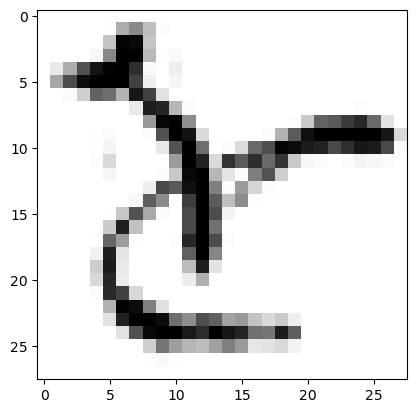

LABEL: 9


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=100, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (40,), (20,20,), (20,20,20), (40,20,10) ]}

mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

clf = GridSearchCV(mlp, parameters, cv=5)
clf.fit(X_train,y_train)

#comparing architectures with different numbers of hidden layers and different sizes
print("\nResults of NN with different size of hidden layers:\n")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

print ('\nRESULTS FOR NN\n')
print("Best parameters set found: ", clf.best_params_)
print("Score with best parameters:", clf.best_score_)
print("\nAll scores on the grid:")
df = pd.DataFrame(clf.cv_results_)
df.head()


Results of NN with different size of hidden layers:

0.703 (+/-0.107) for {'hidden_layer_sizes': (10,)}
0.722 (+/-0.093) for {'hidden_layer_sizes': (20,)}
0.753 (+/-0.039) for {'hidden_layer_sizes': (40,)}
0.737 (+/-0.043) for {'hidden_layer_sizes': (20, 20)}
0.692 (+/-0.059) for {'hidden_layer_sizes': (20, 20, 20)}
0.720 (+/-0.043) for {'hidden_layer_sizes': (40, 20, 10)}

RESULTS FOR NN

Best parameters set found:  {'hidden_layer_sizes': (40,)}
Score with best parameters: 0.7533333333333333

All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.262004,0.038964,0.000474,0.000592,"(10,)","{'hidden_layer_sizes': (10,)}",0.666667,0.666667,0.808333,0.691667,0.683333,0.703333,0.053385,5
1,0.284612,0.029377,0.000000,0.000000,"(20,)","{'hidden_layer_sizes': (20,)}",0.775000,0.658333,0.775000,0.708333,0.691667,0.721667,0.046428,3
2,0.268752,0.015309,0.003125,0.006250,"(40,)","{'hidden_layer_sizes': (40,)}",0.741667,0.741667,0.791667,0.741667,0.750000,0.753333,0.019437,1
3,0.206403,0.011574,0.000000,0.000000,"(20, 20)","{'hidden_layer_sizes': (20, 20)}",0.741667,0.716667,0.766667,0.750000,0.708333,0.736667,0.021473,2
4,0.259423,0.047061,0.000000,0.000000,"(20, 20, 20)","{'hidden_layer_sizes': (20, 20, 20)}",0.691667,0.683333,0.725000,0.716667,0.641667,0.691667,0.029345,6


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [90]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 32, 480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID, hidden_layer_sizes=(40,),
                    learning_rate_init=.1)

# recall to use cv=kf to use the k-fold subdivision seen in the lectures

clf = GridSearchCV(mlp, parameters, cv=kf)
clf.fit(X_train,y_train)

#comparing architectures with different numbers of hidden layers and different sizes
print("\nResults of NN with different batch sizes:\n")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))


print ('\nRESULTS FOR NN\n')
print("Best parameters set found:", clf.best_params_)
print("Score with best parameters:", clf.best_score_)

print("\nAll scores on the grid:")
df = pd.DataFrame(clf.cv_results_)
df.head()
#I get the warning below. When I change the max_iter to 500, 
#it solved but I left the max_iter as 100.

C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multi


Results of NN with different batch sizes:

0.105 (+/-0.034) for {'batch_size': 1}
0.718 (+/-0.098) for {'batch_size': 32}
0.733 (+/-0.043) for {'batch_size': 480}

RESULTS FOR NN

Best parameters set found: {'batch_size': 480}
Score with best parameters: 0.7333333333333333

All scores on the grid:


C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.685977,3.084540,0.000801,0.000400,1,{'batch_size': 1},0.10,0.125000,0.108333,0.116667,0.075000,0.105000,0.017159,3
1,0.255999,0.028764,0.000400,0.000490,32,{'batch_size': 32},0.75,0.733333,0.633333,0.700000,0.775000,0.718333,0.048990,2
2,0.262200,0.006615,0.000802,0.000401,480,{'batch_size': 480},0.75,0.758333,0.700000,0.716667,0.741667,0.733333,0.021731,1


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]

With different architectures and batch sizes, the performance of the nn differed. As the number of layers increases, (comparing (20,) and (20,20)) the performsnce get better. As the sizes of hidden layers increases, (comparing (10,) (20,) (40,)) again, the performance get better. 
As the batch size increases, the performance get better. The best result is with 480 batch size.

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 100 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...


C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Done, training time: 0.52 sec

Training MLP of size (20,) ...
Done, training time: 0.46 sec

Training MLP of size (40,) ...
Done, training time: 0.55 sec

Training MLP of size (20, 20) ...
Done, training time: 0.38 sec

Training MLP of size (40, 20, 10) ...
Done, training time: 0.49 sec



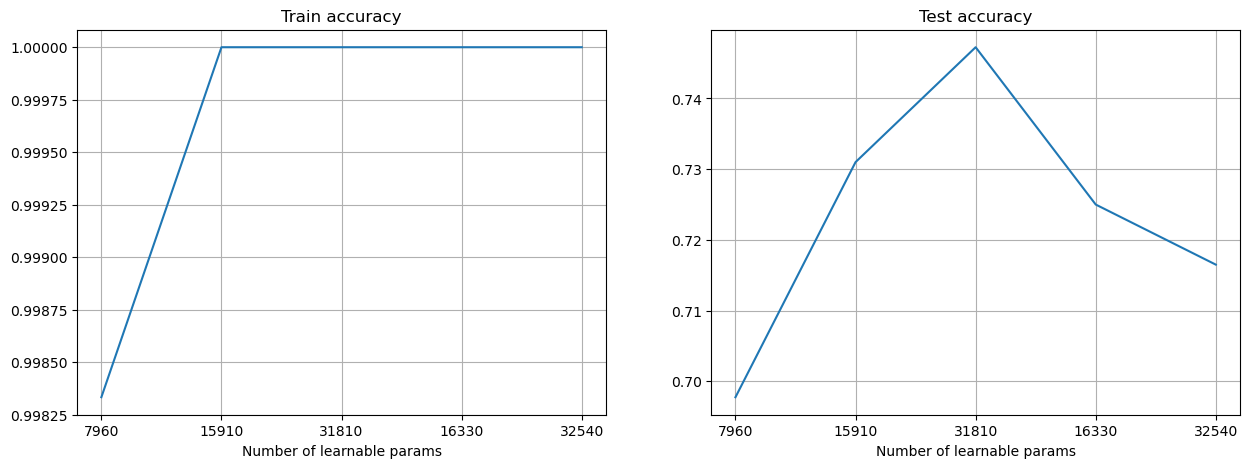

In [117]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (40,), (20,20,), (40,20,10)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID, hidden_layer_sizes=hl_size,
                    learning_rate_init=.1)
    
    mlp.fit(X_train, y_train)
    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

## [ANSWER TO QUESTION 2]

In the training accuracy, it starts to increase and get stable after some point. Test accuracy also starts to increase at the beggining, but after some point, this increase get slower, than it starts to decrease. This means overfitting. In the overfitting, the model memorizes the training data instead of leraning. And when givivng new data that the model did not see before, it fails the label it correctly. This is why the test accuracy starts to decrease after some point. 

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 100 iterations. 

In [9]:
import matplotlib.pyplot as plt
import operator

#best architecture is with hidden layer (40,) and best batch size is 480
parameters = {'hidden_layer_sizes': [(40,)], 'batch_size': [480]}
lr_list = [0.0002, 0.002, 0.02, 0.2]
scores = []

mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=0.0002)

clf = GridSearchCV(mlp, parameters, cv=5)
clf.fit(X_train, y_train)
print("score with learning rate 0.0002: ", clf.best_score_ )

mlp1 = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=0.002)

clf1 = GridSearchCV(mlp1, parameters, cv=5)
clf1.fit(X_train, y_train)
print("score with learning rate 0.002: ", clf1.best_score_ )

mlp2 = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=0.02)

clf2 = GridSearchCV(mlp2, parameters, cv=5)
clf2.fit(X_train, y_train)
print("score with learning rate 0.02: ", clf2.best_score_ )

mlp3 = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=0.2)

clf3 = GridSearchCV(mlp3, parameters, cv=5)
clf3.fit(X_train, y_train)
print("score with learning rate 0.2: ", clf3.best_score_ )

"""
parameters = {'hidden_layer_sizes': [(40,)], 'batch_size': [480]}
lr_list = [0.0002, 0.002, 0.02, 0.2]
for lr in lr_list:
    mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=lr)
    clf = GridSearchCV(mlp, parameters, cv=5)
    clf.fit(X_train, y_train)
    print("score with learning rate 0.0002: ", clf.best_score_ )
"""
#when I run the code with for loop, I get too many error of
#ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
#Also, it took so much time. so, i run the code as above, seperately for every different learning rate. 
#The code with for loop also worked well. I also left it below. 

C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multi

score with learning rate 0.0002:  0.12166666666666667


C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multi

score with learning rate 0.002:  0.5516666666666667


C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multi

score with learning rate 0.02:  0.7350000000000001
score with learning rate 0.2:  0.76


In [17]:
lr_list = [0.0002, 0.002, 0.02, 0.2]
for lr in lr_list:
    mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=lr)
    clf = GridSearchCV(mlp, parameters, cv=5)
    clf.fit(X_train, y_train)
    print(clf.best_score_ )

C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multi

0.30500000000000005


C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multi

0.6833333333333333


C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multi

0.7483333333333333


C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7533333333333333


C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gozde\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


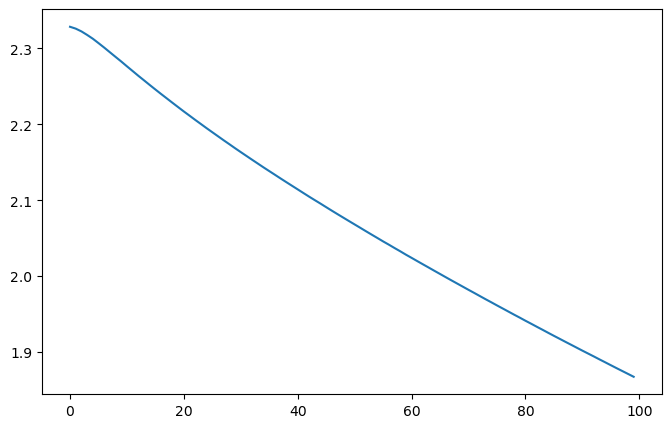

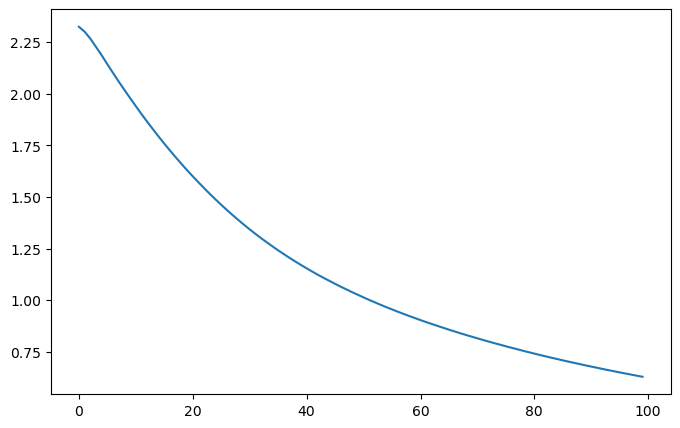

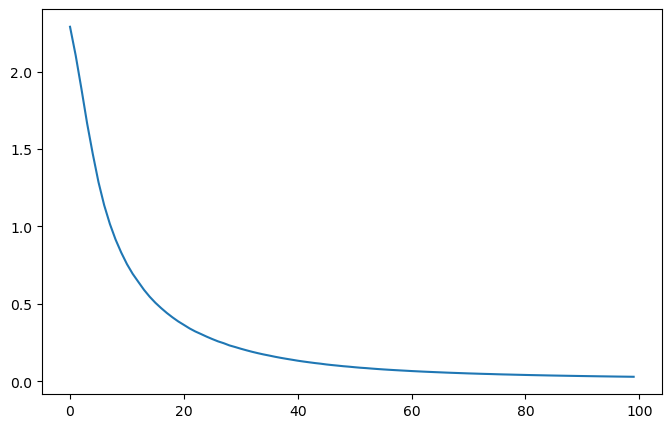

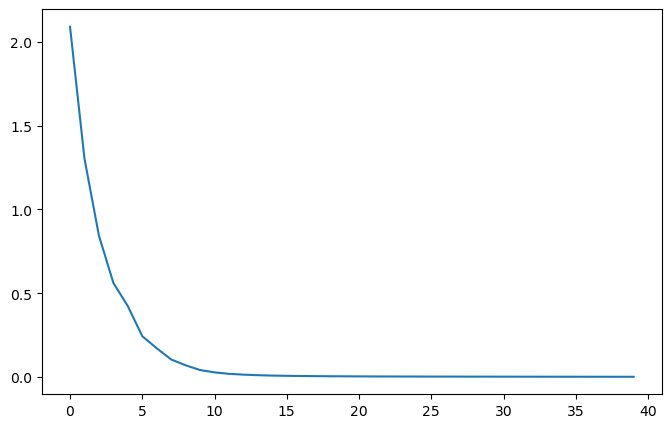

In [19]:
lr_list = [0.0002, 0.002, 0.02, 0.2]
for lr in lr_list:
    mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=lr)
    mlp.fit(X_train,y_train)
    fig, ax = plt.subplots(figsize=(8,5))
    plt.plot(mlp.loss_curve_)

### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 3]

As the learning rate increases, the performance of the model gets better. Also, as the learning rate increases, the speed of convergence also increased. 

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case (you can run the training for 500 iterations).


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.150429


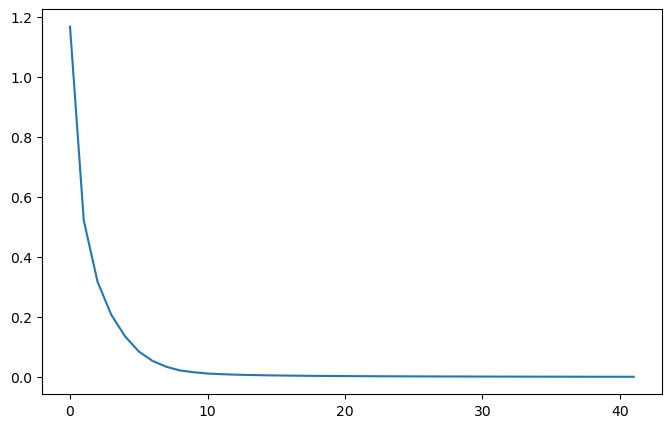

In [30]:
#get training and test error for the best NN model from CV
#best learning rate = 0.2

parameters = {'hidden_layer_sizes': [(40,)], 'batch_size': [480]}
mlp = MLPClassifier(max_iter=500, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=0.2)
mlp.fit(X_train, y_train)

clf = GridSearchCV(mlp, parameters, cv=5)
clf.fit(X_train, y_train)
training_error = 1 - clf.score(X_train, y_train)
test_error = 1 - clf.score(X_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(mlp.loss_curve_)

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [31]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [404 386 415 424 410 399 420 395 364 383]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [32]:
# use best architecture and params from before

parameters = {'hidden_layer_sizes': [(40,)], 'batch_size': [480]}
mlp_large = MLPClassifier(max_iter=500, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID, verbose=True,
                    learning_rate_init=0.2)
mlp_large.fit(X_train,y_train)

clf = GridSearchCV(mlp_large, parameters, cv=5)
clf.fit(X_train, y_train)

print ('\nRESULTS FOR NN\n')

#get training and test error for the NN

training_error = 1 - clf.score(X_train, y_train)
test_error = 1 - clf.score(X_test, y_test)

print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)


Iteration 1, loss = 1.19307171
Iteration 2, loss = 0.48171004
Iteration 3, loss = 0.30536705
Iteration 4, loss = 0.20283476
Iteration 5, loss = 0.12536812
Iteration 6, loss = 0.07820955
Iteration 7, loss = 0.04868534
Iteration 8, loss = 0.03103030
Iteration 9, loss = 0.02163470
Iteration 10, loss = 0.01639025
Iteration 11, loss = 0.01285752
Iteration 12, loss = 0.01030594
Iteration 13, loss = 0.00866166
Iteration 14, loss = 0.00770073
Iteration 15, loss = 0.00680516
Iteration 16, loss = 0.00610975
Iteration 17, loss = 0.00551267
Iteration 18, loss = 0.00505661
Iteration 19, loss = 0.00462603
Iteration 20, loss = 0.00429849
Iteration 21, loss = 0.00398312
Iteration 22, loss = 0.00373485
Iteration 23, loss = 0.00352592
Iteration 24, loss = 0.00331732
Iteration 25, loss = 0.00314964
Iteration 26, loss = 0.00296747
Iteration 27, loss = 0.00283614
Iteration 28, loss = 0.00269815
Iteration 29, loss = 0.00257514
Iteration 30, loss = 0.00247148
Iteration 31, loss = 0.00236522
Iteration 32, los

Iteration 58, loss = 0.00468835
Iteration 59, loss = 0.00457526
Iteration 60, loss = 0.00445130
Iteration 61, loss = 0.00433000
Iteration 62, loss = 0.00423526
Iteration 63, loss = 0.00412818
Iteration 64, loss = 0.00403161
Iteration 65, loss = 0.00394204
Iteration 66, loss = 0.00384878
Iteration 67, loss = 0.00377144
Iteration 68, loss = 0.00370538
Iteration 69, loss = 0.00360973
Iteration 70, loss = 0.00354128
Iteration 71, loss = 0.00347661
Iteration 72, loss = 0.00340250
Iteration 73, loss = 0.00333108
Iteration 74, loss = 0.00326076
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.83894831
Iteration 2, loss = 0.99953395
Iteration 3, loss = 0.66244800
Iteration 4, loss = 0.51448347
Iteration 5, loss = 0.41200032
Iteration 6, loss = 0.34046526
Iteration 7, loss = 0.29098845
Iteration 8, loss = 0.23730023
Iteration 9, loss = 0.20711747
Iteration 10, loss = 0.17388099
Iteration 11, loss = 0.14734441
Iteration 12, loss = 0.

## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

#### [ANSWER TO QUESTION 4]
With large number of samples, the test error get smaller. The best training error was 0 for each case.
When the model has more samples that can be use in the training, it can learn better since it will see different data. Hence, the performance on the test data also will get better. 

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

INPUT:


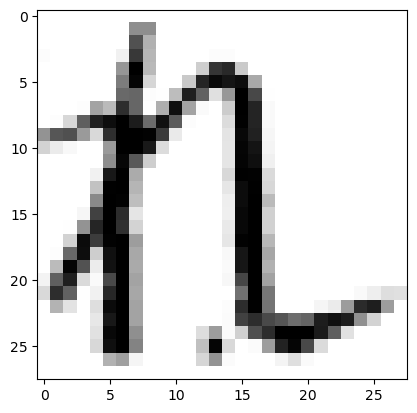

LABEL: 8
NN prediction:  0
Large NN prediction:  8


In [39]:
NN_prediction = mlp.predict(X_test)
large_NN_prediction = mlp_large.predict(X_test)

i = 0
found = False
while ( not found & (i<len(y_test))):
    if (NN_prediction[i] != y_test[i]) and (large_NN_prediction[i] == y_test[i]):
        plot_input(X_test, y_test, i)
        print("NN prediction: ", NN_prediction[i])
        print("Large NN prediction: ", large_NN_prediction[i])
        found = True
        i += 1
    else:
        i += 1
        

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


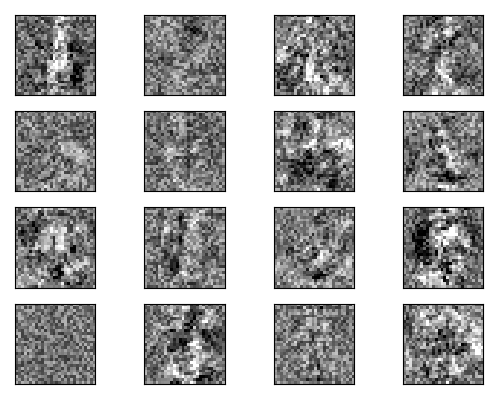

Weights with 4000 data points:


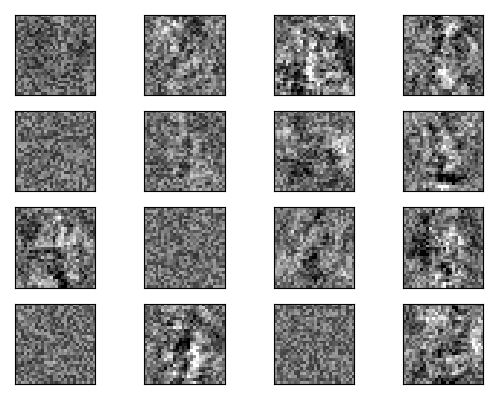

In [34]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_large.coefs_[0].min(), mlp_large.coefs_[0].max()
for coef, ax in zip(mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

##### [ANSWER TO QUESTION 5]
The weights with 600 data points have more stucture comparing with the weights with 4000 data points. 

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [35]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting

best_params = {'C': [10],'gamma':[0.01]}

svc = SVC(kernel = 'rbf')
model = GridSearchCV(svc, best_params)
model.fit(X_train, y_train)

print ('RESULTS FOR SVM')

SVM_training_error =  1 - model.score(X_train, y_train)

print("Training score SVM:")
print(SVM_training_error)

SVM_test_error = 1 - model.score(X_test, y_test)
print("Test score SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training score SVM:
0.0
Test score SVM:
0.08540000000000003


In [38]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 1)

# you can re-use your code from Lab 2

lr.fit(X_train, y_train)

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

training_error =  1 - lr.score(X_train, y_train)
test_error =  1 - lr.score(X_test, y_test)

print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)


RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.033800
Test error (reg): 0.251800


C:\Users\gozde\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## QUESTION 6
Compare the results of Logistic Regression (LR), SVM and NN. Which one achieve the best results? 


###### [ANSWER TO QUESTION 6]

The training error is 0 for SVM and NN, while it is 0.033 for LR. So, for training error, LR has the worse performance.
Comparing the test errors;

NN = 0.152429

SVM = 0.08540

LR = 0.25180

So, SVM has the better performance while LR has the worse. 

## QUESTION 7

What are the different ways in which you can improve the results obtained for NN? List and justify some of them.

##### [ANSWER TO QUESTION 7]
With increasing the number of samples, we can improve the performance of the NN. We saw that above while comparing the models that used 600 training data and 4000 training data. The one that used 4000 training data had better performance. 